In [1]:
!pip install statsmodels



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")


In [9]:
#STEP 4: Load the Dataset
df = pd.read_csv("price_data.csv")
df.head()


,date,avg_monthly_price
0,2005-01-01,5500
1,2005-02-01,5476
2,2005-03-01,5466
3,2005-04-01,5487
4,2005-05-01,5876


In [10]:
if df.index.name == 'date':
    df.reset_index(inplace=True)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.sort_values('date')
df.set_index('date', inplace=True)
df.head()

,avg_monthly_price
date,
2005-01-01,5500
2005-02-01,5476
2005-03-01,5466
2005-04-01,5487
2005-05-01,5876


In [7]:
#STEP 6: Check Missing Values
df.isnull().sum()


,0
avg_monthly_price,0


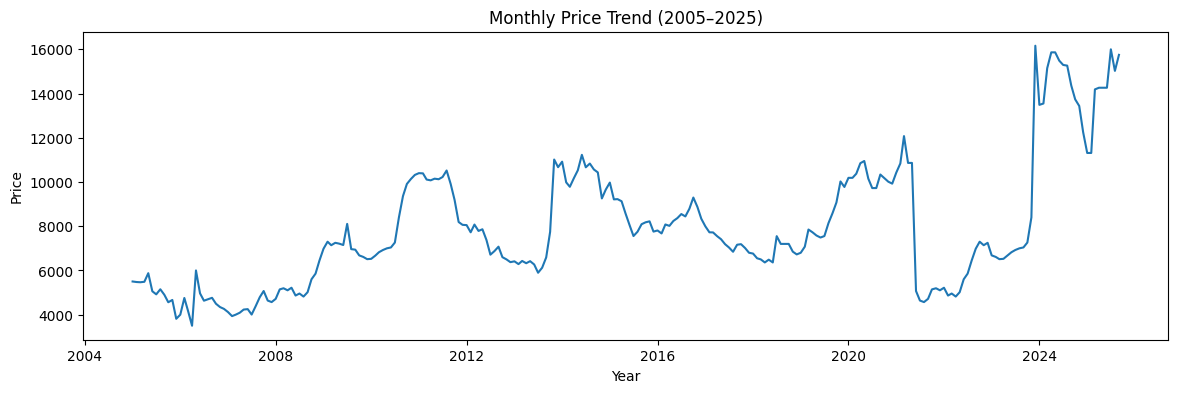

In [11]:
#STEP 7: Visualize Price Trend
plt.figure(figsize=(14,4))
plt.plot(df.index, df['avg_monthly_price'])
plt.title("Monthly Price Trend (2005–2025)")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


In [12]:
#STEP 8: Train–Test Split
train = df[:-12]
test = df[-12:]

print("Train size:", train.shape)
print("Test size:", test.shape)


Train size: (237, 1)
Test size: (12, 1)


In [13]:
#STEP 9: Build SARIMA Model
model = SARIMAX(
    train['avg_monthly_price'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()


In [14]:
#STEP 10: Forecast Next 12 Months
forecast = model_fit.forecast(steps=12)
forecast


,predicted_mean
2024-10-01,14727.800693
2024-11-01,14733.917744
2024-12-01,15745.141606
2025-01-01,15336.866443
2025-02-01,15402.587741
2025-03-01,15681.329329
2025-04-01,15750.734147
2025-05-01,15731.497700
2025-06-01,15168.654370
2025-07-01,15052.617550


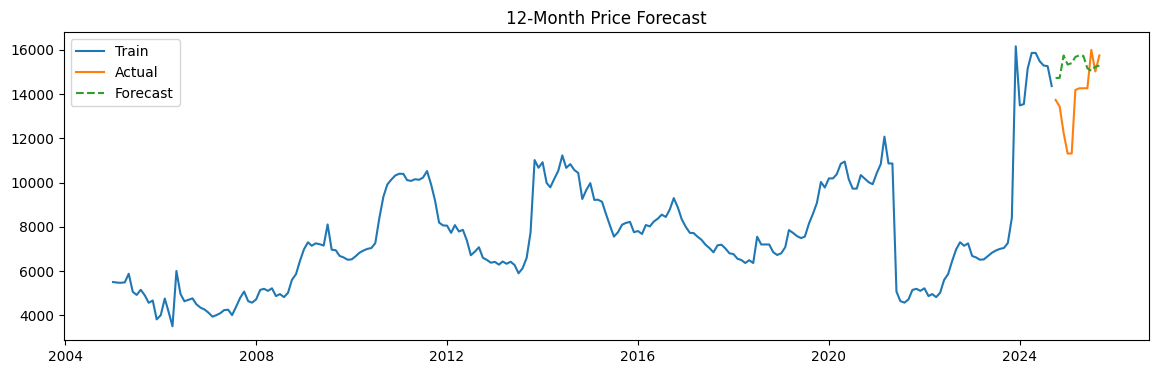

In [15]:
#STEP 11: Plot Forecast vs Actual
plt.figure(figsize=(14,4))
plt.plot(train.index, train['avg_monthly_price'], label='Train')
plt.plot(test.index, test['avg_monthly_price'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("12-Month Price Forecast")
plt.show()


In [16]:
#STEP 12: Model Evaluation Metrics
mae = mean_absolute_error(test['avg_monthly_price'], forecast)
rmse = np.sqrt(mean_squared_error(test['avg_monthly_price'], forecast))
mape = np.mean(np.abs((test['avg_monthly_price'] - forecast) / test['avg_monthly_price'])) * 100

print("MAE :", mae)
print("RMSE:", rmse)
print("MAPE:", mape)


MAE : 1740.1424740426057
RMSE: 2167.432158085003
MAPE: 13.753036233989057


In [17]:
#STEP 13: Save Model
import joblib
joblib.dump(model_fit, "price_forecast_model.pkl")



['price_forecast_model.pkl']

In [19]:
# Model Selection
# SARIMA was chosen because the dataset is monthly and shows seasonal patterns.
# The model captures trend, seasonality, and random fluctuations effectively.

# Evaluation
# MAE, RMSE, and MAPE were used to measure prediction accuracy.
# MAPE is easy for business stakeholders to interpret.